In [ ]:
PERAMALAN MENGGUNAKAN PYTHON

In [17]:
pip install pandas numpy matplotlib statsmodels sklearn tensorflow

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [19]:
import pandas as pd

# meramalkan penjualan bulan berikutnya menggunakan rata-rata penjualan dari bulan sebelumnya.
data = pd.read_csv('sales_data.csv', parse_dates=['Month'], index_col='Month')
forecast = data['Revenue'].mean()
print(f"Perkiraan penjualan bulan berikutnya: {forecast}")

Perkiraan penjualan bulan berikutnya: 754.3703598853463


C:\Users\NASWA\AppData\Local\Temp\ipykernel_8652\3800986131.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('sales_data.csv', parse_dates=['Month'], index_col='Month')


In [21]:
# Moving Average adalah salah satu teknik yang lebih baik dibandingkan rata-rata sederhana, 
# karena mempertimbangkan nilai rata-rata dalam rentang waktu tertentu.

window = 3  # Rentang waktu untuk rata-rata bergerak
data['Moving_Average'] = data['Revenue'].rolling(window=window).mean()
print(data.tail())


             Date  Day  Year  Customer_Age       Age_Group Customer_Gender  \
Month                                                                        
April  2016-04-12   12  2016            41  Adults (35-64)               M   
April  2014-04-02    2  2014            18     Youth (<25)               M   
April  2016-04-02    2  2016            18     Youth (<25)               M   
March  2014-03-04    4  2014            37  Adults (35-64)               F   
March  2016-03-04    4  2016            37  Adults (35-64)               F   

              Country          State Product_Category Sub_Category  \
Month                                                                
April  United Kingdom        England         Clothing        Vests   
April       Australia     Queensland         Clothing        Vests   
April       Australia     Queensland         Clothing        Vests   
March          France  Seine (Paris)         Clothing        Vests   
March          France  Seine (Par

In [23]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(data['Revenue'])
model_fit = model.fit(smoothing_level=0.2, optimized=False)
forecast = model_fit.forecast(steps=12)
print(forecast)

D:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
D:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


113036    965.283155
113037    965.283155
113038    965.283155
113039    965.283155
113040    965.283155
113041    965.283155
113042    965.283155
113043    965.283155
113044    965.283155
113045    965.283155
113046    965.283155
113047    965.283155
dtype: float64


In [25]:
# ARIMA adalah salah satu model forecasting time series yang paling umum digunakan. 
# Model ini menggabungkan komponen autoregresi, integrasi, dan moving average.

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['Revenue'], order=(5,1,0))  # (p,d,q)
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)
print(forecast)

D:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
D:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
D:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\ANACONDA\Lib\site-packages\statsmodels\tsa\base

113036    1048.646075
113037     985.111247
113038    1105.947545
113039    1110.486649
113040    1116.345592
113041    1102.030827
113042    1094.934941
113043    1083.040252
113044    1098.046526
113045    1097.652954
113046    1099.470999
113047    1096.053967
Name: predicted_mean, dtype: float64


D:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
pip install tensorflow

In [36]:
# Preprocessing menggunakan LSTM
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data_values = data['Revenue'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_values)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 3
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], time_step, 1)
X_test = X_test.reshape(X_test.shape[0], time_step, 1)

D:\ANACONDA\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 2.2454e-04
Epoch 2/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1.9804e-04
Epoch 3/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1.9728e-04
Epoch 4/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1.9054e-04
Epoch 5/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 1.9219e-04
Epoch 6/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1.8868e-04
Epoch 7/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.8931e-04
Epoch 8/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1.8240e-04
Epoch 9/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1.8856e-04
Epoch 10/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 1.8498e-04
Epoch 11/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 1.7925e-04
Epoch 12/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1.8604e-04
Epoch 13/100
2826/2826 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1.8165e-04
Epoch 14/100
2826/2826 ━━━━━━━━━

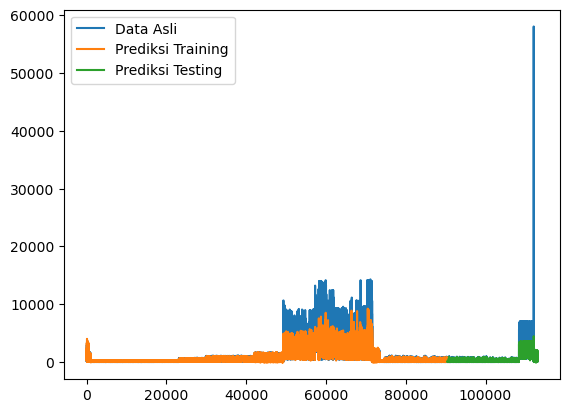

In [38]:
# Membangun model LSTM sederhana menggunakan keras dan tensorflow.
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

import matplotlib.pyplot as plt

plt.plot(scaler.inverse_transform(scaled_data), label='Data Asli')
plt.plot(np.arange(time_step, len(train_predict) + time_step), train_predict, label='Prediksi Training')
plt.plot(np.arange(len(train_predict) + 2*time_step, len(train_predict) + 2*time_step + len(test_predict)), test_predict, label='Prediksi Testing')
plt.legend()
plt.show()
